In [1]:
import geopandas as gpd
from dbfread import DBF
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
import os
import pyproj

In [16]:
re_road = gpd.read_file(r"C:\Users\HUAWEI\Desktop\hackthon\START_Hackathon\road_stream_reporjected\road_reprojected.shp")
print(re_road.loc[0, 'geometry'])

LINESTRING (-1340037.3682505565 1961727.6800594036, -1337938.117425602 1962582.435772664, -1336093.6112044444 1963778.0119706932, -1334223.2751046596 1964460.5259677512, -1331078.2663412346 1966484.0579239815, -1329679.046970249 1967795.81927006, -1328494.9473701834 1969740.3900535756, -1327982.0189508782 1970582.3670945656, -1326615.3665590843 1971306.0298420258, -1325307.353511381 1972978.7258800885, -1324059.432262851 1973527.0332371462, -1322770.9058268857 1973849.1656225964)


In [12]:
re_streams = gpd.read_file('road_stream_reporjected\streams_reprojected.shp')
print(re_streams.loc[0, 'geometry'])

LINESTRING (-1216616.0007193193 1833278.9710254408, -1216312.1303667384 1833538.878339931, -1216035.6804177144 1833507.7548448835, -1215779.2619214922 1833705.4262887822, -1215449.0255509154 1833784.130146571, -1215338.4435154302 1833732.880347115, -1215300.690442327 1833656.0112076835, -1215194.630607782 1833654.187608831, -1215135.4174695066 1833698.1096543618, -1215049.462214474 1833729.2220299048, -1214951.254887693 1833718.247078275, -1214865.321665903 1833619.4057965726, -1214524.3375017561 1833661.5042432516, -1214037.8474762281 1833720.0706771272, -1213399.8273215727 1833674.3139132385)


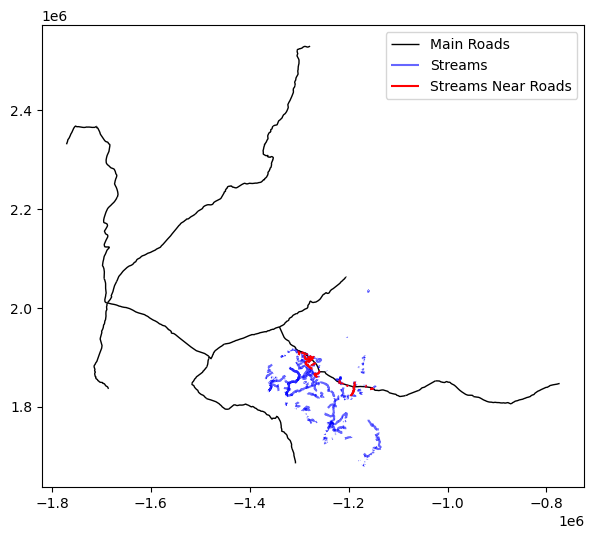

In [8]:
#Identify Intersections (Streams Crossing Roads)
buffered_roads = re_road.buffer(500)  # 500 meters buffer around roads
streams_near_roads_1 = re_streams[re_streams.geometry.intersects(buffered_roads.union_all())]
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))
re_road.plot(ax=ax, color="black", linewidth=1, label="Main Roads")
re_streams.plot(ax=ax, color="blue", alpha=0.6, label="Streams")
streams_near_roads_1.plot(ax=ax, color="red", label="Streams Near Roads")

plt.legend()
plt.show()


In [18]:
print(type(streams_near_roads_1))

<class 'geopandas.geodataframe.GeoDataFrame'>


In [17]:
tif_path = "Datasets_Hackathon/MODIS_Gross_Primary_Production_GPP/2010_GP.tif"

with rasterio.open(tif_path) as src:
    # 获取 GeoTIFF 的 CRS
    tif_crs = src.crs
    print(tif_crs)

PROJCS["unnamed",GEOGCS["GCS_Unknown_datum_based_upon_the_custom_spheroid",DATUM["D_Not_specified_based_on_custom_spheroid",SPHEROID["Custom_spheroid",6371007.181,0]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Sinusoidal"],PARAMETER["longitude_of_center",0],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]


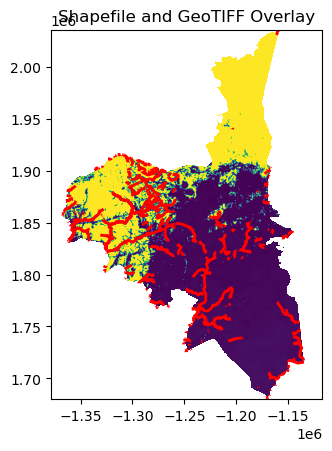

In [23]:
fig, ax = plt.subplots()
tif_path = "Datasets_Hackathon/MODIS_Gross_Primary_Production_GPP/2010_GP.tif"
with rasterio.open(tif_path) as src:
    img_data = src.read(1) 
    transform = src.transform
    crs = src.crs
    show(src, ax=ax)
    

    re_streams.plot(ax=ax, facecolor='none', edgecolor='red', linewidth=2)

ax.set_title("Shapefile and GeoTIFF Overlay")

# 显示图像
plt.show()

In [ ]:
#Identify Intersections (Streams Crossing Roads)
buffered_roads = gdf_roads.buffer(500)  # 500 meters buffer around roads
streams_near_roads_1 = gdf_streams[gdf_streams.geometry.intersects(buffered_roads.union_all())]

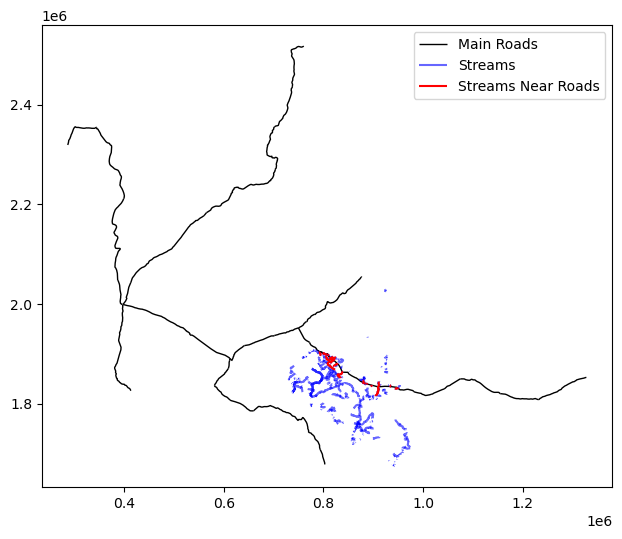

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))
gdf_roads.plot(ax=ax, color="black", linewidth=1, label="Main Roads")
gdf_streams.plot(ax=ax, color="blue", alpha=0.6, label="Streams")
streams_near_roads_1.plot(ax=ax, color="red", label="Streams Near Roads")

plt.legend()
plt.show()


In [ ]:
# # Create X and Y arrays for all years combined

# # First, determine valid pixels across all datasets and years
# valid_mask = np.ones((dst_height, dst_width), dtype=bool)
# for dataset_name, years_data in all_data.items():
#     for year, data in years_data.items():
#         # Update mask for invalid values (assuming NaN or negative values are invalid)
#         if np.issubdtype(data.dtype, np.floating):
#             valid_mask = valid_mask & ~np.isnan(data)
#         valid_mask = valid_mask & (data >= 0)

# # Count how many valid samples we'll have
# n_samples = np.sum(valid_mask)
# print(f"Total valid samples across all years: {n_samples}")

# # Create X (features) and Y (target) arrays
# n_years = len(years)
# n_features = len([d for d in datasets if not d.get('is_reference', False)])
# X = np.zeros((n_samples * n_years, n_features))
# Y = np.zeros(n_samples * n_years)

# # Create a dataframe to store the data
# columns = ['year', 'lat', 'lon', 'land']
# for dataset in [d for d in datasets if not d.get('is_reference', False)]:
#     short_name = dataset['name'].split('_')[0].lower()
#     columns.append(short_name)

# df = pd.DataFrame(columns=columns)

# # Fill the dataframe
# sample_idx = 0
# for year_idx, year in enumerate(years):
#     # Get valid coordinates
#     rows, cols = np.where(valid_mask)
    
#     # Temporary data for this year
#     year_data = []
    
#     for i in range(len(rows)):
#         row, col = rows[i], cols[i]
        
#         # Skip if any dataset has invalid data for this pixel in this year
#         skip = False
#         for dataset_name, years_data in all_data.items():
#             if year not in years_data or np.isnan(years_data[year][row, col]):
#                 skip = True
#                 break
#         if skip:
#             continue
            
#         # Create a row in the dataframe
#         row_data = {
#             'year': year,
#             'lat': row,
#             'lon': col,
#             'land': all_data['land'][year][row, col]
#         }
        
#         # Add feature data
#         feature_idx = 0
#         for dataset in [d for d in datasets if not d.get('is_reference', False)]:
#             short_name = dataset['name'].split('_')[0].lower()
#             row_data[short_name] = all_data[short_name][year][row, col]
#             # Also add to X array
#             X[sample_idx, feature_idx] = all_data[short_name][year][row, col]
#             feature_idx += 1
        
#         # Add to Y array
#         Y[sample_idx] = all_data['land'][year][row, col]
        
#         # Add to temporary data
#         year_data.append(row_data)
        
#         sample_idx += 1
    
#     # Add this year's data to the dataframe
#     df = pd.concat([df, pd.DataFrame(year_data)], ignore_index=True)
#     print(f"Added {len(year_data)} samples for year {year}")

# # Trim excess rows if needed
# if sample_idx < n_samples * n_years:
#     X = X[:sample_idx, :]
#     Y = Y[:sample_idx]
#     print(f"Trimmed arrays to actual size: {sample_idx} samples")

# # Save the prepared data
# df.to_csv('all_data_prepared.csv', index=False)
# np.save('X_features.npy', X)
# np.save('Y_target.npy', Y)

# print("Data preparation complete!")
# print(f"Feature array shape: {X.shape}")
# print(f"Target array shape: {Y.shape}")
# print(f"CSV data shape: {df.shape}")


In [ ]:
# # Load Streamwater shapefile and reproject it
# stream_path = "Datasets_Hackathon/Streamwater_Line_Road_Network/Streamwater.shp"
# stream = gpd.read_file(stream_path)

# # Load GPP GeoTIFF to get CRS, bounds, and transform
# tif_path = "Datasets_Hackathon/Land_Cover_Data/2010LCT.tif"
# with rasterio.open(tif_path) as src:
#     tif_crs = src.crs
#     tif_transform = src.transform
#     tif_width = src.width
#     tif_height = src.height
#     bbox = src.bounds  # Get bounding box

# # Reproject the stream to the CRS of the GPP raster
# stream = stream.to_crs(tif_crs)

# # Clip the stream with the GPP raster's bounding box (from previous code)
# from shapely.geometry import box
# raster_bbox = box(bbox[0], bbox[1], bbox[2], bbox[3])
# bbox_gdf = gpd.GeoDataFrame(geometry=[raster_bbox], crs=tif_crs)
# stream_clipped = gpd.overlay(stream, bbox_gdf, how='intersection')

# # Rasterize the clipped stream
# # Create a mask where the stream features will be '1', and other areas will be '0'
# stream_mask = geometry_mask(stream_clipped.geometry, transform=tif_transform, invert=True,
#                             out_shape=(tif_height, tif_width))

# # Now we create the output TIFF (rasterized stream)
# output_tif_path = "Datasets_Hackathon/reprojected_data/Streamwater_reprojected.tif"
# with rasterio.open(output_tif_path, 'w', driver='GTiff', height=tif_height, width=tif_width,
#                    count=1, dtype='uint8', crs=tif_crs, transform=tif_transform) as dst:
#     dst.write(stream_mask.astype('uint8'), 1)  # Write the rasterized stream to the first band

In [ ]:
# stream_water = []
# with rasterio.open("Datasets_Hackathon/reprojected_data/Streamwater_reprojected.tif") as src:
#     data_array = src.read(1)
#     stream_water = data_array

In [ ]:
# rows, cols = stream_water.shape
# row_indices, col_indices = np.indices((rows, cols))  # Get row and column indices

# # Flatten the arrays to create a long format
# df_stream = pd.DataFrame({
#     'lat': row_indices.flatten(),
#     'lon': col_indices.flatten(),
#     'stream': stream_water.flatten()
# })

# # Check the first few rows of the dataframe
# df_stream

In [ ]:
# Sinusoidal projection parameters based on PROJ4
proj_sinu = Proj('+proj=sinu +a=6371007.181 +b=6371007.181 +units=m')

# Define the center of the image (Assaba center in lat/lon)
lat_center = 16.759763
lon_center = -11.725705

# Define pixel resolution in meters based on given CRS (463.312716525 m)
pixel_resolution = 463.312716525

# Image shape (769 rows, 565 columns)
rows, cols = 769, 565

# Calculate the easting and northing for the center point in the sinusoidal projection
center_easting, center_northing = proj_sinu(lon_center, lat_center)

# Create empty lists to store coordinates (easting and northing)
eastings = []
northings = []

# Loop through the image pixels to calculate projected coordinates
for row in range(rows):
    for col in range(cols):
        # Calculate pixel offsets from the center in meters
        northing_offset = (row - rows // 2) * pixel_resolution
        easting_offset = (col - cols // 2) * pixel_resolution

        # Calculate real-world coordinates in sinusoidal projection
        easting = center_easting + easting_offset
        northing = center_northing + northing_offset

        # Append to lists
        eastings.append(easting)
        northings.append(northing)

# Convert projected coordinates back to longitude and latitude (pyproj returns lon, lat)
longitudes, latitudes = proj_sinu(eastings, northings, inverse=True)

# Create a DataFrame to store the coordinates
coords_df = pd.DataFrame({'Latitude': latitudes, 'Longitude': longitudes})

# Reshape the DataFrame to match the image shape
coords_df = coords_df.values.reshape(rows, cols, 2)  # Reshape to (769, 565, 2) for easier access

# Coordinate dictionary (row, col) -> (Latitude, Longitude)
coords_dict = {(row, col): (coords_df[row, col, 0], coords_df[row, col, 1]) for row in range(rows) for col in range(cols)}

# to be updated

In [ ]:
# 2010,2015,2020 population per pixel
# 1. <0 invalid data ->0
# 2. LAT LON df
# 3. calculation
all_data['gridded']

In [ ]:
# Gridded land use -- get the hotspots top3 pixel
# Store transformed dataframes
df_dict = {}

# Process each year's array
for year, array in all_data['gridded'].items():
    # Replace negative values with 0
    array = np.maximum(array, 0)

    # Get row (lat) and column (lon) indices
    rows, cols = np.indices(array.shape)

    # Convert to DataFrame
    df = pd.DataFrame({
        'lat': rows.flatten(),  # Row index as latitude
        'lon': cols.flatten(),  # Column index as longitude
        'value': array.flatten()  # Flattened values
    })

    # Store in dictionary
    df_dict[year] = df
    
    # create population dataframe for finalised merged df
    population_df_list = []
    for year, df in df_dict.items():
        # Add a 'year' column to each DataFrame
        df['year'] = year
        
        # Append the DataFrame to the list
        population_df_list.append(df)

    # Concatenate all DataFrames into a single DataFrame
    population_df = pd.concat(population_df_list, ignore_index=True)
    
    population_df.to_csv('population_df.csv')

# Compute differences
df_diff_2015_2010 = df_dict[2015].copy()
df_diff_2020_2015 = df_dict[2020].copy()

# Subtract values
df_diff_2015_2010['value'] -= df_dict[2010]['value']
df_diff_2020_2015['value'] -= df_dict[2015]['value']

# rename value column to avoid confusion
df_diff_2015_2010 = df_diff_2015_2010.rename(columns={'value': 'diff'})
df_diff_2020_2015 = df_diff_2020_2015.rename(columns={'value': 'diff'})

# Sort df_diff_20xx_20xx in descending order
df_diff_2015_2010_sorted = df_diff_2015_2010.sort_values(by='diff', ascending=False)
df_diff_2020_2015_sorted = df_diff_2020_2015.sort_values(by='diff', ascending=False)

# Extract the top 3 largest and bottom 3 smallest values
top_3_2015_2010 = df_diff_2015_2010_sorted.head(3)
bottom_3_2015_2010 = df_diff_2015_2010_sorted.tail(3)
selected_2015_2010 = pd.concat([top_3_2015_2010, bottom_3_2015_2010], ignore_index=True)
selected_2015_2010['year'] = 2015
selected_2015_2010['type'] = 'population'

# Extract the top 3 largest and bottom 3 smallest values
top_3_2020_2015 = df_diff_2020_2015_sorted.head(3)
bottom_3_2020_2015 = df_diff_2020_2015_sorted.tail(3)
selected_2020_2015 = pd.concat([top_3_2020_2015, bottom_3_2020_2015], ignore_index=True)
selected_2020_2015['year'] = 2020
selected_2020_2015['type'] = 'population'


In [ ]:
# GPP extract the top 3 largest and bottem 3 smallest data point
gross_df = pd.read_csv('merged_df.csv')

# Extract data for each year
df_2010 = gross_df[gross_df['year'] == 2010][['lat', 'lon', 'gross']]
df_2015 = gross_df[gross_df['year'] == 2015][['lat', 'lon', 'gross']]
df_2020 = gross_df[gross_df['year'] == 2020][['lat', 'lon', 'gross']]

# Merge on lat and lon
gross_df_2015_2010 = df_2015.merge(df_2010, on=['lat', 'lon'], suffixes=('_2015', '_2010'))
gross_df_2020_2015 = df_2020.merge(df_2015, on=['lat', 'lon'], suffixes=('_2020', '_2015'))


# Compute difference
gross_df_2015_2010['diff'] = gross_df_2015_2010['gross_2015'] - gross_df_2015_2010['gross_2010']
gross_df_2020_2015['diff'] = gross_df_2020_2015['gross_2020'] - gross_df_2020_2015['gross_2015']


# Keep only relevant columns
gross_df_2020_2015 = gross_df_2020_2015[['lat', 'lon', 'diff']]
gross_df_2015_2010 = gross_df_2015_2010[['lat', 'lon', 'diff']]

# Sort by 'value' in descending order
gross_df_diff_2015_2010_sorted = gross_df_2015_2010.sort_values(by='diff', ascending=False)
gross_df_diff_2020_2015_sorted = gross_df_2020_2015.sort_values(by='diff', ascending=False)

# Extract the top 3 largest and bottom 3 smallest values
gross_top_3_2015_2010 = gross_df_diff_2015_2010_sorted.head(3)
gross_bottom_3_2015_2010 = gross_df_diff_2015_2010_sorted.tail(3)
gross_select_2015_2010 = pd.concat([gross_top_3_2015_2010, gross_bottom_3_2015_2010], ignore_index=True)
gross_select_2015_2010['year'] = 2015
gross_select_2015_2010['type'] = 'gpp'

gross_top_3_2020_2015 = gross_df_diff_2020_2015_sorted.head(3)
gross_bottom_3_2020_2015 = gross_df_diff_2020_2015_sorted.tail(3)
gross_select_2020_2015 = pd.concat([gross_top_3_2020_2015, gross_bottom_3_2020_2015], ignore_index=True)
gross_select_2020_2015['year'] = 2020
gross_select_2020_2015['type'] = 'gpp'


In [ ]:
# concat the dataframes
dfs = [selected_2015_2010, selected_2020_2015, gross_select_2015_2010, gross_select_2020_2015]
combined_df = pd.concat(dfs, ignore_index=True)

file_path = os.path.join(save_path, 'combined_population_gpp_pixcel.csv')

combined_df.to_csv(file_path, index=False)

In [ ]:
arrrr = all_data['gridded'][2010]
filtered_arr = arrrr[arrrr >= 0]
len(filtered_arr)